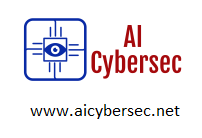

# Regularisation - Lasso, Ridge & Elastic



---

### Learning Objectives 
- Learn about regularization for regression models
- Understand how regularization modifies the loss function
- Understand the effect of regularization on coefficients
- Look at the differences between the Lasso, Ridge, and ElasticNet
- Implement and visualize the penalties using sklearn

<a id='intro'></a>

## Review of the OLS

---
In group of two, please reply to the following questions:
- what's the difference between the equations of yhat and y for Single LR?
- what's the OLS (Ordinary Least Squares) loss function?
- what's R2 formula and meaning?
- what are the 5 assumptions of MLR (LINEI)?
- what's the difference between the equations of yhat and y for Multiple LR?
- what's the solution of beta for MLR?
    



### Lesson Guide
- [Overview of regularization](#intro)
- [Review: the least-squares loss function](#lsq-loss)
- [The Ridge penalty](#ridge)
- [The Lasso penalty](#lasso)
- [The Elastic-Net penalty](#elastic-net)
- [What is the effect of regularization](#effect)
- [Standardizing predictors is required](#standardization)
- [Visualizing the Ridge](#viz-ridge)
- [Visualizing the Lasso](#viz-lasso)
- [Visualizing the Elastic-Net](#viz-elastic-net)
- [Model performance with complex predictor matrix using regularization](#model-performance)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import widgets


sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='intro'></a>

## Overview of regularization

---

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a trade off between fitting well and keeping the parameters small.



#### Generalization Problem in Regression


#### Before regularisation:

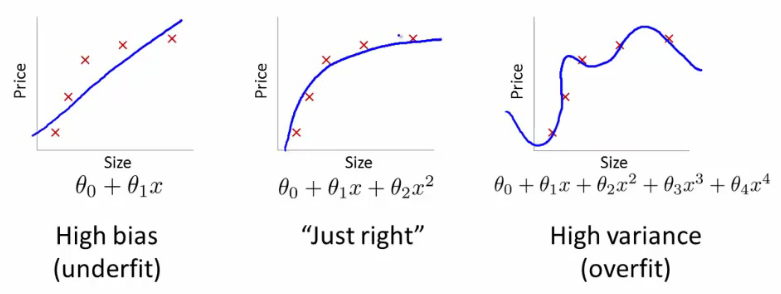

#### After regularisation:

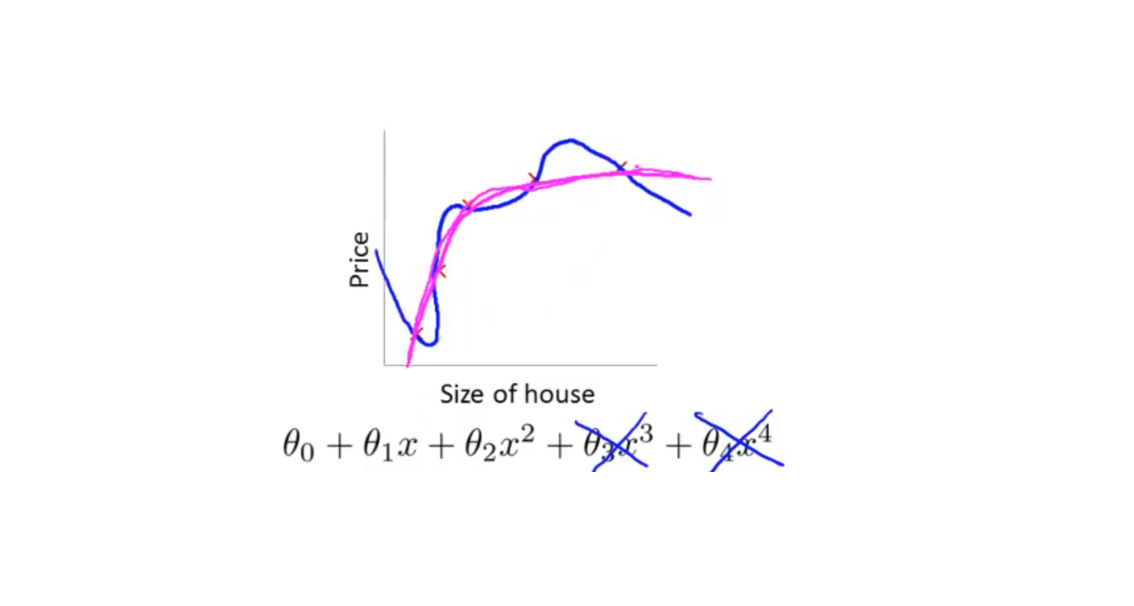
---

___

<a id='lsq-loss'></a>

## As a conclusions => 3 situations where regularisation is useful:


- Overfitting
- Curse of dimensionality
- High covariance between variables



---


The two most common types of regularization are the **Lasso**, **Ridge**. There is a mixture of them called the **Elastic Net**. We will take a look at the mathematics of regularization and the effect these penalties have on model fits.

<a id='lsq-loss'></a>

## Review: least squares loss function

---

Ordinary least squares regression minimizes the residual sum of squares (RSS) to fit the data:

$$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 $$

where our model predictions for $y$ are based on the sum of the $\beta_0$ intercept and the products of $\beta_j$ with $x_{ij}$.

Alternatively, in matrix notation using predictor matrix $X$, residual errors $\epsilon$ and vector of beta coefficients $\beta$:

$$ \text{minimize:}\; RSS = \epsilon' \epsilon = (y - X\beta)' (y - X\beta ) $$

<a id='ridge'></a>

## The Ridge penalty

---

Ridge regression adds the sum of the squared (non-intercept!) $\beta$ values to the loss function

$$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

**where**

$\beta_j^2$ is the squared coefficient for variable $x_j$.

$\sum_{j=1}^n \beta_j^2$ is the sum of these squared coefficients for every variable we have in our model. This does **not** include the **intercept $\beta_0$** (this is a convention).

$\lambda_2$ is a constant for the _strength_ of the **regularization parameter**. The higher this value, the greater the impact of this new component in the loss function. 

Question? What happen if it is equal to 0 ?

If this were, say, a billion, then the residual sum of squares component would have a much smaller effect on the loss/cost than the regularization term.

With the penalty added the RSS is referred to as the **penalized residual sum of squares (PRSS)**. In matrix format the Ridge PRSS is:

$$ \text{Ridge PRSS} = (y - X\beta)' (y - X\beta) + \lambda_2 \; ||\beta||^2_2 $$

where $||\beta||_2^2$ is the squared norm of the coefficient vector (again, excluding intercept).

The derivative we set to zero to solve for the coefficients becomes:

$$ \frac{\partial PRSS}{\partial \beta} = -2X'y + 2X'X\beta + 2\lambda_2 \beta$$

and the solution to the beta coefficient vector is:

$$ \text{Ridge }  \beta = (X'X + \lambda_2I)^{-1}X'y $$

<a id='lasso'></a>

## The Lasso penalty

---

The Lasso regression takes a different approach. Instead of adding the sum of _squared_ $\beta$ coefficients to the RSS, it adds the sum of the _absolute values_ of the $\beta$ coefficients

$$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

**where**

$|\beta_j|$ is the absolute value of the $\beta$ coefficient for variable $x_j$

$\lambda_1$ is again the strength of the regularization penalty component in the loss function. In lasso the lambda is denoted with a 1, in ridge the lambda is denoted with a 2.


**In matrix format the Lasso PRSS is:**

$$ \text{Lasso PRSS} = (y - X\beta)' (y - X\beta) + \lambda_1 \; ||\beta||_1 $$

where $||\beta||_1$ is the sum of the absolute values of the coefficient vector.

Unlike the Ridge, however, there is not a closed-form solution for the Lasso beta coefficients.

<a id='elastic-net'></a>

## Elastic Net penalty

---

Elastic Net is simply a combination of the Lasso and the Ridge regularizations. It adds *both* penalties to the loss function:

$$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_{ij}\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2$$

In the elastic net, the effect of the Ridge vs. the Lasso is balanced by the two lambda parameters. 

<a id='effect'></a>

## What is the effect of regularization?

---

**To demonstrate the effects we will be using a dataset on wine quality.**

An important aspect of this data, which is a reason why we might choose to use regularization, is that there is **multicollinearity** in the data. The term multicollinearity means that there are high correlations between predictor variables in your model. 

**This can lead to a variety of problems including:**
1. The effect of predictor variables estimated by your regression will **depend on what other variabes** are included in your model.
2. With very high multicollinearity, the **inverse matrix the computer calculates may not be accurate**.
3. We can no longer **interpret a coefficient on a variable** as the effect on the target of a one unit increase in that variable holding the other variables constant. This is because when predictors are strongly correlated, there is not a scenario in which one variable can change without **a conditional change** in another variable.

The Ridge is faster to compute but won't do features selection

Lasso deals well with multicollinearity between variables, but in a brutal way (it "zeroes out" the less effective variable).

The Lasso is particularly useful when you have redundant or unimportant variables. If you have **1000 variables in a dataset** the Lasso can perform "feature selection" automatically for you by forcing coefficients to be zero.

### Load the wine csv

This version has red and white wines concatenated together and tagged with a binary 1,0 indicator (1 is red wine). There are many other variables purportedly related to the rated quality of the wine.

In [2]:
wine = pd.read_csv('d:/data//winequality_merged.csv')

# replace spaces in column names and convert all columns to lowercase:
wine.columns = [x.lower().replace(' ','_') for x in wine.columns]

In [3]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine_corr = wine.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


C:\Users\aicyb\AppData\Local\Temp\ipykernel_26580\2701234215.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(wine_corr, dtype=np.bool)


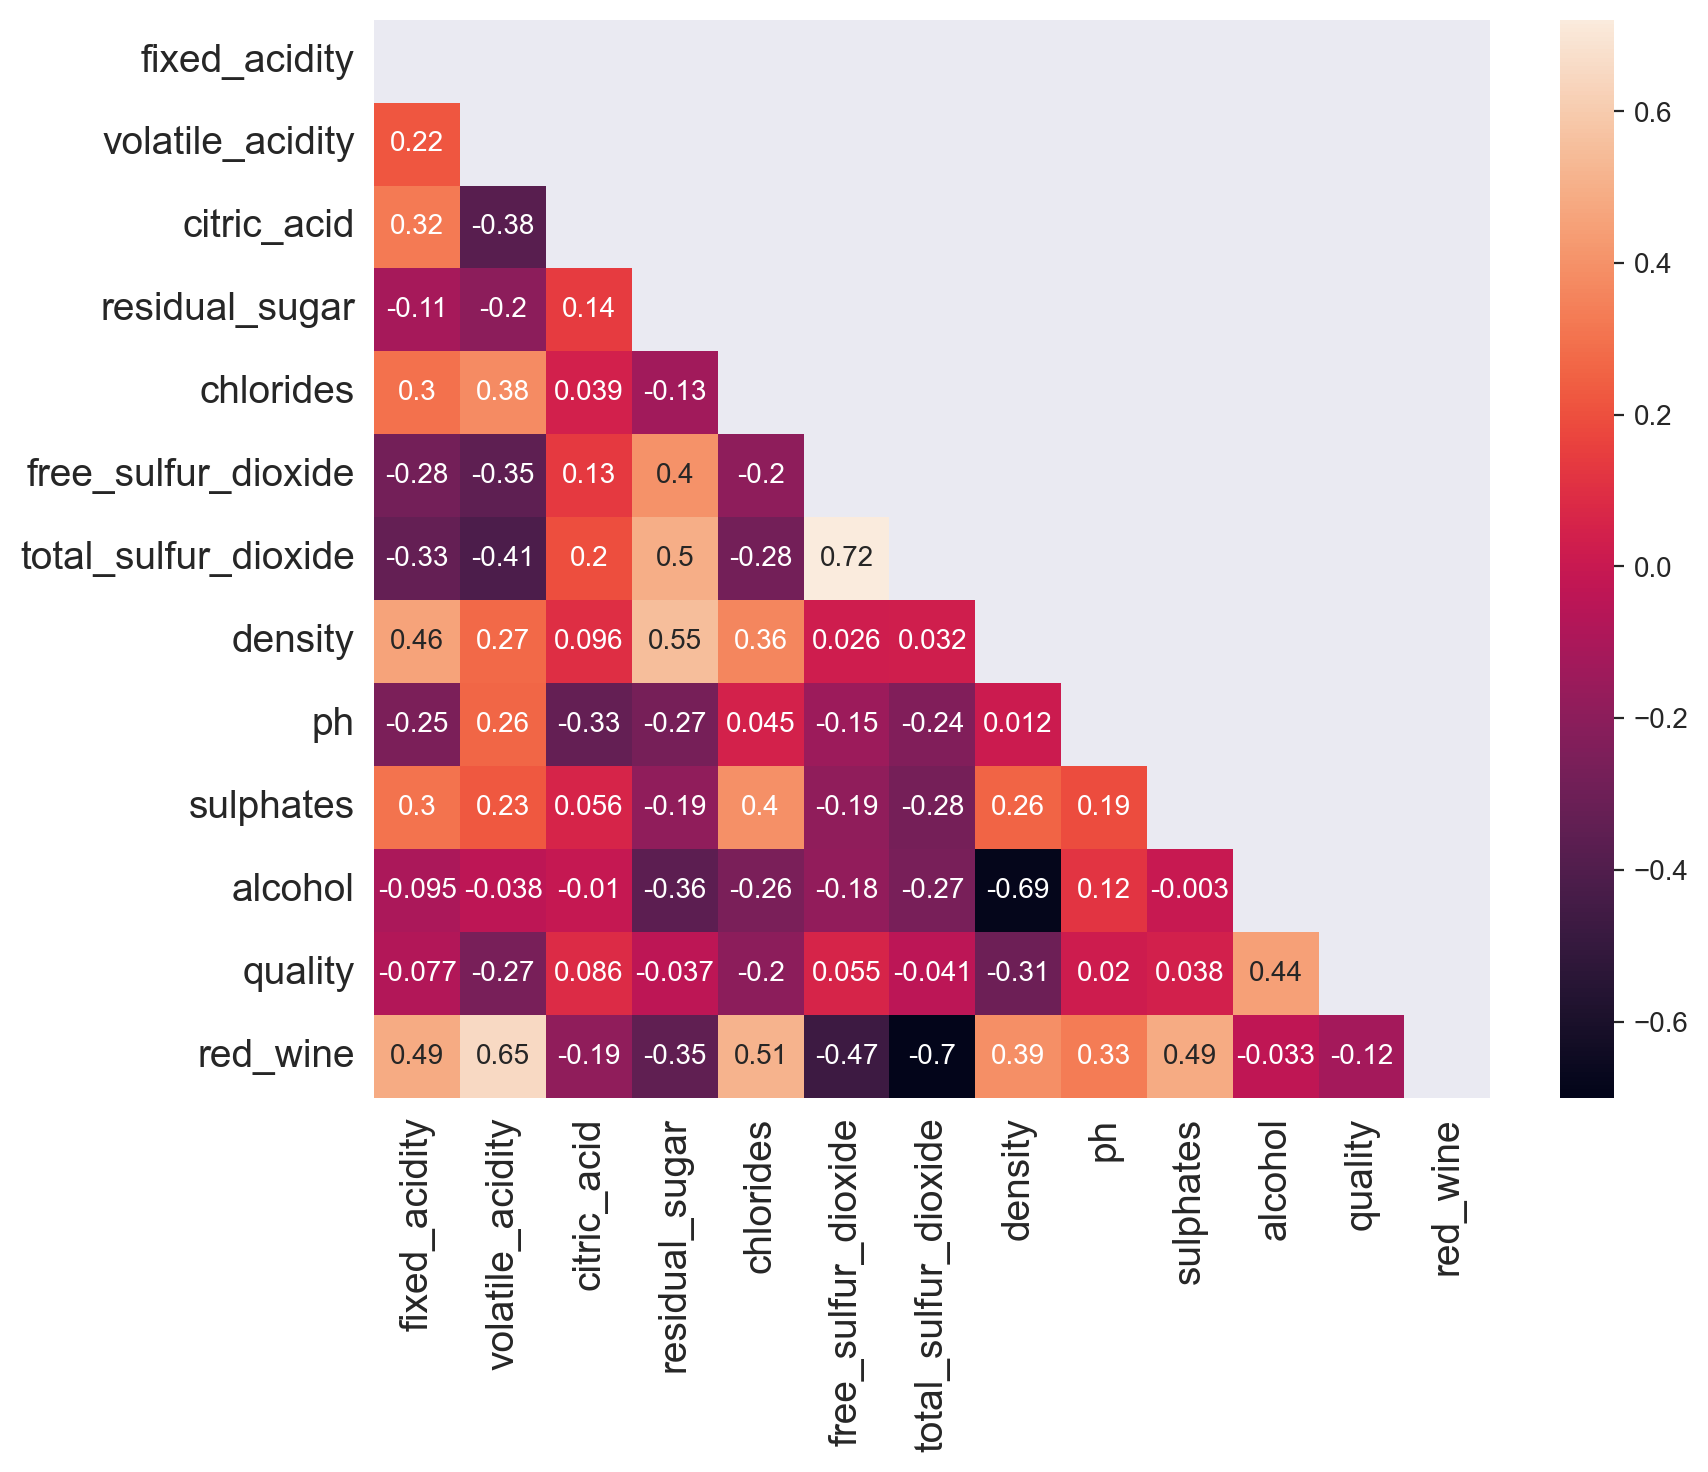

In [5]:
# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(wine_corr, annot=True, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

<a id='standardization'></a>

## Standardizing predictors is required

---

With the Lasso and Ridge it is neccessary to **standardize the predictor columns** before constructing the models, even the dummy coded categorical variables. 

Below we define our target variable and then normalize the columns that are not the target.

Recall the equations for the Ridge and Lasso penalties:

### $$ \text{Ridge penalty}\; = \lambda_2\sum_{j=1}^p \beta_j^2$$

### $$ \text{Lasso penalty}\; = \lambda_1\sum_{j=1}^p |\beta_j|$$

**How are the $\beta$ coefficients are affected by the mean and variance of your variables?**

If the mean and variance of your $x$ predictors are different, **their respective $\beta$ coefficients** *scale with the mean and variance of the predictors regardless of their explanatory power.*

**Checkout (5min): What does standardize  predictors mean? And explain in your own words why it necessary when using penalized regressions**


In [6]:
# Choose a target/dependent variable that we will predict
target = 'quality'

In [7]:
# select all the columns that are not the target
nc = [x for x in wine.columns if x != target]

In [8]:
# Let's standardise all the columns 
# We could have used one of the preproc classes of Sklearn here...
wine.loc[:, nc] = (wine.loc[:, nc] - wine.loc[:, nc].mean()) / wine.loc[:, nc].std()

In [9]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,1.750055
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,5,1.750055
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,5,1.750055
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,6,1.750055
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,1.750055


### Create the target and predictor matrix with patsy

We will be making two X, Y datasets. One of them will be dramatically more complex (and thus overfit).

1. The first is going to just be all the variables added together.
2. The second will have all interactions between the variables included. This should overfit the target quite a bit!


In [10]:
import patsy

# Get the non-target cols with a simple list comprehension
non_target_cols = [c for c in wine.columns if c != target]

# Use some string adding and joining to make the simple model formula:
formula_simple = target + ' ~ ' + ' + '.join(non_target_cols)+ ' -1'
print(f"Formula_simple: {formula_simple} \n")

# Make the complex formula:
formula_complex = target + ' ~ (' + ' + '.join(non_target_cols) + ')**2 -1'
print(f"Formula_complex: {formula_complex} \n")

Formula_simple: quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + ph + sulphates + alcohol + red_wine -1 

Formula_complex: quality ~ (fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + ph + sulphates + alcohol + red_wine)**2 -1 



In [11]:
# Create the X and Y pairs for both!
Y, X = patsy.dmatrices(formula_simple, data=wine, return_type='dataframe')
Yoverfit, Xoverfit = patsy.dmatrices(formula_complex, data=wine, return_type='dataframe')

Y = Y.values.ravel()
Yoverfit = Yoverfit.values.ravel()

In [12]:
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'red_wine'],
      dtype='object')

In [13]:
Xoverfit.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'red_wine',
       'fixed_acidity:volatile_acidity', 'fixed_acidity:citric_acid',
       'fixed_acidity:residual_sugar', 'fixed_acidity:chlorides',
       'fixed_acidity:free_sulfur_dioxide',
       'fixed_acidity:total_sulfur_dioxide', 'fixed_acidity:density',
       'fixed_acidity:ph', 'fixed_acidity:sulphates', 'fixed_acidity:alcohol',
       'fixed_acidity:red_wine', 'volatile_acidity:citric_acid',
       'volatile_acidity:residual_sugar', 'volatile_acidity:chlorides',
       'volatile_acidity:free_sulfur_dioxide',
       'volatile_acidity:total_sulfur_dioxide', 'volatile_acidity:density',
       'volatile_acidity:ph', 'volatile_acidity:sulphates',
       'volatile_acidity:alcohol', 'volatile_acidity:red_wine',
       'citric_acid:residual_sugar', 'citric_acid:chlorides',
       'citric_acid:f

**Look at how the shapes of the X matrices differ. You can see that the Xoverfit has considerably more columns due to the creation of all possible two-way interactions.**

In [14]:
print(X.shape)
print(Xoverfit.shape)

(6497, 12)
(6497, 78)


<a id='viz-ridge'></a>

## Visualizing the Ridge

---

Import the `Ridge` model class from sklearn.

In [15]:
from sklearn.linear_model import Ridge

This function iterates over a series of different alpha regularization parameters. The alpha is sklearn's equivalent of the lambda value in the formula that multiples the square of betas from the equation.

The function stores the results of the model so that we can plot them interactively.

In [16]:
def ridge_coefs(X, Y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)
        
        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

Alpha values for the ridge are best visualized on a logarithmic "magnitude" scale.

In [17]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X, Y, r_alphas)

The plotting function below will:

 - Plot the effect of changing alpha on the coefficient size on a **path** graph
 - Plot the effect of changing alpha on the coefficient size on a **bar** graph
 
Each one gives informative information. It's just two different ways of visualizing the same thing. The chart is interactive so you can play around with the values of alpha across the specified range above.

In [18]:
# The cycler package lets us "cycle" throug colors.
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # printa vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('coefficients', fontsize=20)
    
    plt.show()


Load the ipython widgets so we can make this plotting function interactive!

In [19]:
from ipywidgets import *
from IPython.display import display

The function and `interact` from ipywidgets lets me take some specified alphas that we have already calculated the coefficients for and plot them out.

In [20]:
def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

interactive(children=(FloatSlider(value=0.0, description='log_of_alpha', max=5.0, step=0.05), Output()), _dom_…

<function __main__.ridge_plot_runner(log_of_alpha=0)>

<a id='viz-lasso'></a>

## Visualizing the Lasso

---

Now we do the same thing as above but for the Lasso. You will be able to see how the coefficients change differently for both.

In [21]:
from sklearn.linear_model import Lasso

In [22]:
# This is the same as the ridge coefficient by alpha calculator
def lasso_coefs(X, Y, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(X, Y)
        coefs.append(lasso_reg.coef_)
        
    return coefs


Alphas for the Lasso tend to effect regularization linearly rather than by orders of magnitude like in the ridge. 

A linear series of alphas is sufficient.

In [23]:
l_alphas = np.arange(0.001, 0.15, 0.0025)
l_coefs = lasso_coefs(X, Y, l_alphas)

Run the same plotting function above, but now with the calculated coefficients of alpha for the Lasso.

In [24]:
def lasso_plot_runner(alpha=0):
    coef_plotter(l_alphas, l_coefs, X.columns, alpha, regtype='lasso')

interact(lasso_plot_runner, alpha=(0.001,0.2,0.0025))


interactive(children=(FloatSlider(value=0.001, description='alpha', max=0.2, min=0.001, step=0.0025), Output()…

<function __main__.lasso_plot_runner(alpha=0)>

<a id='viz-elastic-net'></a>

## Visualizing the Elastic Net

---

Recall that the Elastic Net combines the Ridge and Lasso penalties.

`ElasticNet` in sklearn has two parameters:
- `alpha`: the regularization strength.
- `l1_ratio`: the amount of L1 vs L2 penalty. An l1_ratio of 0 is equivalent to the Ridge, whereas an l1_ratio of 1 is equivalent to the Lasso.


In [25]:
from sklearn.linear_model import ElasticNet

Calculate the coefficients with both alpha values and an l1_ratio of 0.05. Lasso can "overpower" the Ridge penalty in some datasets, and so rather than an equal balance I'm just adding a little bit of Lasso in.

In [26]:
# This is the same as the ridge coefficient by alpha calculator
def elasticnet_coefs(X, Y, alphas):
    coefs = []
    enet_reg = ElasticNet()
    for a in alphas:
        enet_reg.set_params(alpha=a, l1_ratio=0.05)
        enet_reg.fit(X, Y)
        coefs.append(enet_reg.coef_)
        
    return coefs

In [27]:
enet_alphas = np.arange(0.01, 1.0, 0.005)
enet_coefs = elasticnet_coefs(X, Y, enet_alphas)

In [28]:
def enet_plot_runner(alpha=0.01):
    coef_plotter(enet_alphas, enet_coefs, X.columns, alpha, regtype='elastic net')

interact(enet_plot_runner, alpha=(0.0,1.0,0.005))

interactive(children=(FloatSlider(value=0.01, description='alpha', max=1.0, step=0.005), Output()), _dom_class…

<function __main__.enet_plot_runner(alpha=0.01)>